In [1]:
import sys
import sys
sys.path.append("../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
importlib.reload(ApRESDefs) 
xa = ApRESDefs.xapres(max_range=1400)
xa.load_all(directory='gs://ldeo-glaciology/GL_apres_2022/A103', 
            remote_load = True,
            file_numbers_to_process=range(10,200,10)
           )
xa.data

<xarray.Dataset>
Dimensions:          (time: 1678, chirp_time: 40001, chirp_num: 20,
                      attenuator_setting_pair: 2, profile_range: 6658)
Coordinates:
  * time             (time) datetime64[ns] 2022-05-31T10:58:32 ... 2022-11-22...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
    filename         (time) <U83 'ldeo-glaciology/GL_apres_2022/A103/CardA/DI...
    burst_number     (time) int64 0 1 2 3 4 5 6 7 8 ... 86 87 88 89 90 91 92 93
    AFGain           (attenuator_setting_pair) int64 -4 -14
    attenuator       (attenuator_setting_pair) float64 5.0 5.0
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 ...
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 ...
    latitude         (time) float64 68.74 68.74 68.74 ... 68.74 68.74 68.74
    longitude        (time) float64 -49.49 -49.49 -49.49 ... -49.49 -49.49
    battery_voltage  (time) float64 13.66 13.68 13.63 ... 12.88 12.88 12.87
    temperature_1    (time) float64 4.484 3.109 3.898 ... 505.7 504.9 502.9
    temperature_2    (time) float64 8.125 6.359 8.125 8.32 ... 502.3 500.7 501.5

In [2]:
xa.data.nbytes/1e9

28.630120848

In [1]:
xa.data.temperature_1.plot(marker='.', linestyle='', ylim = [-10,30])

NameError: name 'xa' is not defined

In [ ]:
xa.data.nbytes/1e9

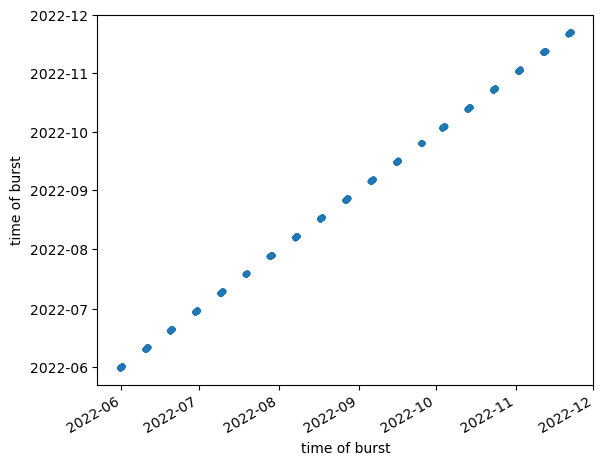

In [3]:
xa.data.time.plot(marker='.', linestyle='')

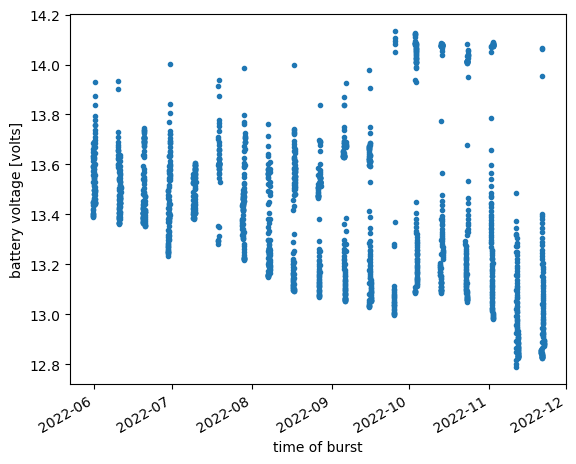

In [4]:
xa.data.battery_voltage.plot(marker='.', linestyle='');

In [5]:
import numpy as np
time_in_field = xa.data.time[-1] - xa.data.time[13]
days = time_in_field.values.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

174.0

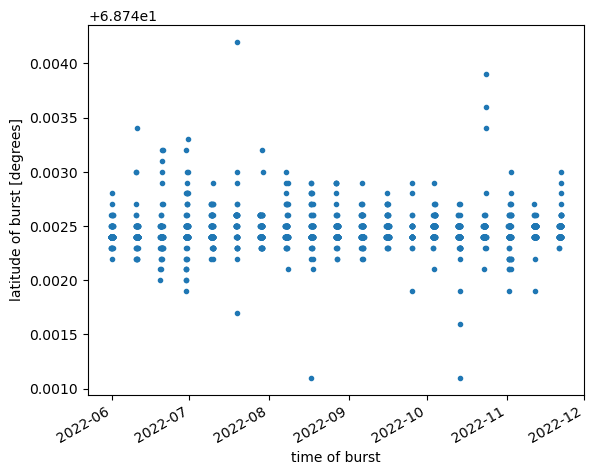

In [6]:
xa.data.latitude.plot(marker='.', linestyle='')

In [7]:
# time: 470chirp_time: 40001  chirp_num: 20   attenuator_setting_pair: 2
xa.data.profile.isel(time = 1, chirp_num = 0, attenuator_setting_pair = 0)

<xarray.DataArray 'profile' (profile_range: 6658)>
array([ 1.02348115e-02+0.00000000e+00j,  1.16264167e-05+9.00696658e-03j,
       -6.05166028e-03+2.10966246e-05j, ...,
       -1.26409923e-05-9.54152700e-06j,  2.18546563e-05-1.21705819e-05j,
        3.34224462e-06+2.72581429e-05j])
Coordinates:
    time           datetime64[ns] 2022-05-31T11:13:10
  * profile_range  (profile_range) float64 0.0 0.2103 0.4206 ... 1.4e+03 1.4e+03
    chirp_num      int64 0
    filename       <U83 'ldeo-glaciology/GL_apres_2022/A103/CardA/DIR2022-05-...
    burst_number   int64 1
    AFGain         int64 -4
    attenuator     float64 5.0
Attributes:
    long_name:    profile
    units:        -
    description:  complex profile computed from the fourier transform of the ...

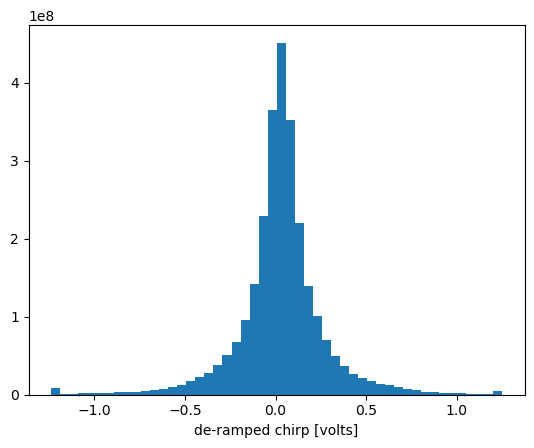

In [8]:
xa.data.chirp.plot(bins = 50);

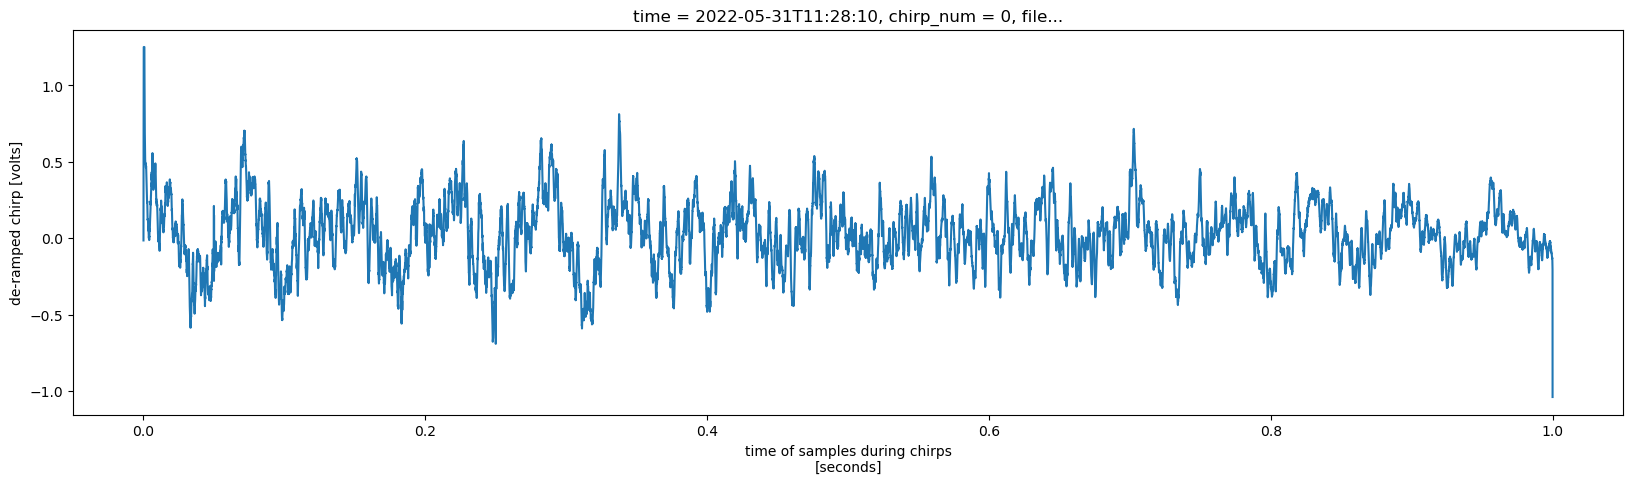

In [9]:
xa.data.chirp.isel(time=2, chirp_num = 0, attenuator_setting_pair=0).plot(figsize = (20,5));

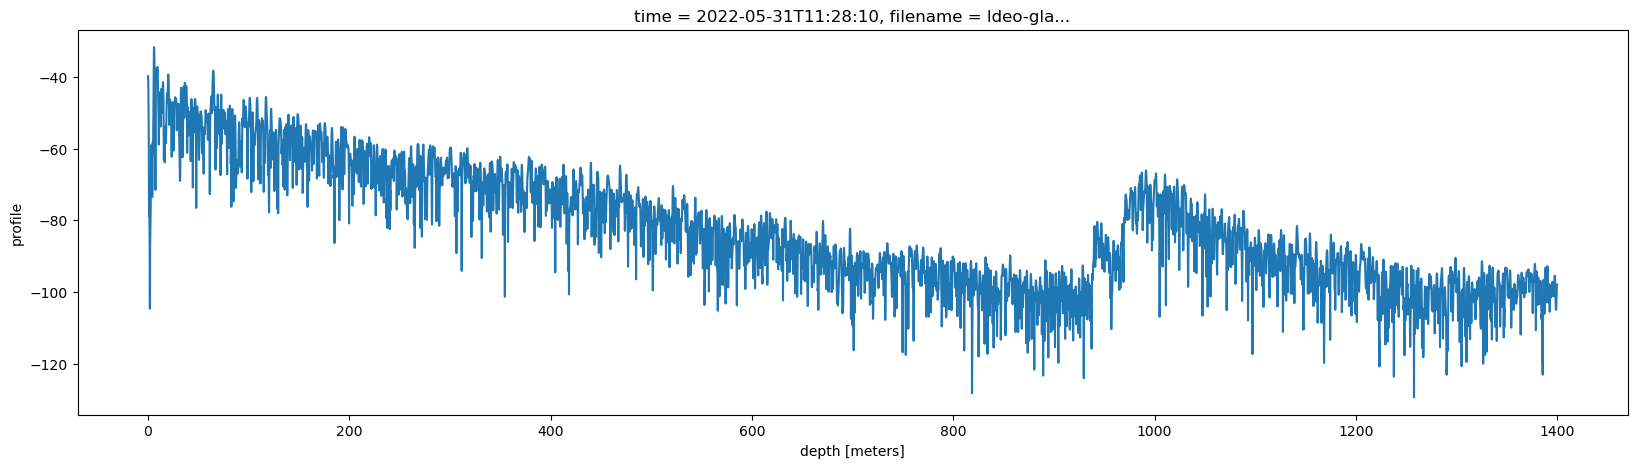

In [10]:
# stack the data (this line stacks both the chirps and the profiles, but you could just do the profiles)
stacked = xa.data.isel(time=2, attenuator_setting_pair=0).mean(dim='chirp_num')
# extract just the profiles
stacked_profile = stacked.profile
# compute the decibel profiles
dB = xa.dB(stacked_profile)
# plot the result
dB.plot(figsize = (20,5));

In [ ]:
import fsspec
import xarray as xr
import json
import gcsfs
## define a mapper to the ldeo-glaciology bucket
### needs a token
with open('/Users/jkingslake/Documents/misc/ldeo-glaciology-bc97b12df06b.json') as token_file:
    token = json.load(token_file)

filename = 'gs://ldeo-glaciology/GL_apres_2022_zarr_test_01'
    
mapper = fsspec.get_mapper(filename, mode='w', token=token)

xa.data.to_zarr(mapper)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jkingslake/Documents/misc/ldeo-glaciology-bc97b12df06b.json'